In [17]:
from PolynomialRegressionModel import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NN import NeuralNetModel
import json

In [18]:
with open("config.json", "r") as f:
    config = json.load(f)

In [19]:
model_config = config["models"]
model_config

{'enabled': True,
 'model_name': 'Cases',
 'model': {'type': 'neural_net',
  'alpha': 1e-06,
  'hidden_layer_sizes': 5000,
  'learning_rate_init': 0.01,
  'max_iter': 100000,
  'batch_size': 32,
  'tol': 1e-06,
  'n_iter_no_change': 250,
  'verbose': False},
 'datagrabber_class': 'CasesDataGrabber',
 'grab_data_from_server': True,
 'offline_dataset_date': '2020-09-26',
 'days_to_predict': 10}

In [20]:
df = pd.read_csv('../Data/Confirmed_Cases_US_Vaccinated_NewDataset.csv').drop(columns=['Unnamed: 0'])
df

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-01-22,1.0,0.0
1,2020-01-23,1.0,0.0
2,2020-01-24,2.0,0.0
3,2020-01-25,2.0,0.0
4,2020-01-26,5.0,0.0
...,...,...,...
462,2021-04-28,32230850.0,199426393.0
463,2021-04-29,32289049.0,202713598.0
464,2021-04-30,32346971.0,206220484.0
465,2021-05-01,32392274.0,210278776.0


In [29]:
x = np.array(df.iloc[0:400,:].index.values.tolist()).reshape(-1, 1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [30]:
list = []
for i in range(0,32):
    list.append(400 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[400],
       [401],
       [402],
       [403],
       [404],
       [405],
       [406],
       [407],
       [408],
       [409],
       [410],
       [411],
       [412],
       [413],
       [414],
       [415],
       [416],
       [417],
       [418],
       [419],
       [420],
       [421],
       [422],
       [423],
       [424],
       [425],
       [426],
       [427],
       [428],
       [429],
       [430],
       [431]])

In [32]:
y_v_train = df.iloc[0:400,-1]
y_v_train

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
395    36662603.0
396    38646621.0
397    39830639.0
398    40753622.0
399    42237364.0
Name: People_Fully_Vaccinated, Length: 400, dtype: float64

In [33]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x, y_v_train, model_config["model"])

In [34]:
beginning_day=len(x)
limit=10
next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
y_v_pred = neural_net_model.get_predictions(x_pred)

In [35]:
y_v_pred

array([25171161, 25633732, 26096302, 26558873, 27021444, 27484014,
       27946585, 28409155, 28871726, 29334296, 29796867, 30259438,
       30722008, 31184579, 31647149, 32109720, 32572290, 33034861,
       33497432, 33960002, 34422573, 34885143, 35347714, 35810285,
       36272855, 36735426, 37197996, 37660567, 38123137, 38585708,
       39048279, 39510849], dtype=int32)

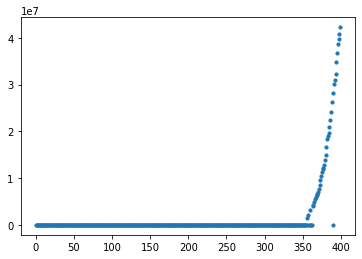

In [36]:
plt.scatter(x, y_v_train, s=10)

In [45]:
y_v_test = df.iloc[400:432,-1]
y_v_test

400     44096712.0
401     46252199.0
402     48493135.0
403     50699588.0
404     52096977.0
405     53501643.0
406     55126552.0
407     56841037.0
408     58691006.0
409     60883263.0
410     62744094.0
411     64390483.0
412     65646672.0
413     67289666.0
414     69252556.0
415     71578210.0
416     75543687.0
417     76609480.0
418     78440516.0
419     79872266.0
420     81800777.0
421     83829418.0
422     85777975.0
423     88020607.0
424     90272606.0
425     91843540.0
426     93096352.0
427     94791129.0
428     96938836.0
429     99546515.0
430    102491174.0
431    105451667.0
Name: People_Fully_Vaccinated, dtype: float64

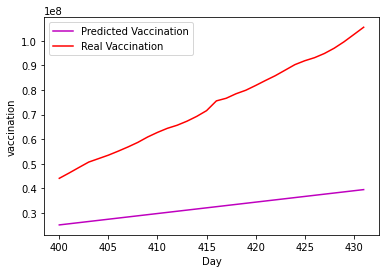

In [46]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred, y_v_test, color='r',label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

In [47]:
y_c_train = df.iloc[400:432,1]
vaccination = df.iloc[400:432,-1]
vaccination

400     44096712.0
401     46252199.0
402     48493135.0
403     50699588.0
404     52096977.0
405     53501643.0
406     55126552.0
407     56841037.0
408     58691006.0
409     60883263.0
410     62744094.0
411     64390483.0
412     65646672.0
413     67289666.0
414     69252556.0
415     71578210.0
416     75543687.0
417     76609480.0
418     78440516.0
419     79872266.0
420     81800777.0
421     83829418.0
422     85777975.0
423     88020607.0
424     90272606.0
425     91843540.0
426     93096352.0
427     94791129.0
428     96938836.0
429     99546515.0
430    102491174.0
431    105451667.0
Name: People_Fully_Vaccinated, dtype: float64

In [53]:
x_c_train = np.vstack((np.array(df.iloc[400:432,:].index.values.tolist()), vaccination)).T
x_c_train

array([[4.00000000e+02, 4.40967120e+07],
       [4.01000000e+02, 4.62521990e+07],
       [4.02000000e+02, 4.84931350e+07],
       [4.03000000e+02, 5.06995880e+07],
       [4.04000000e+02, 5.20969770e+07],
       [4.05000000e+02, 5.35016430e+07],
       [4.06000000e+02, 5.51265520e+07],
       [4.07000000e+02, 5.68410370e+07],
       [4.08000000e+02, 5.86910060e+07],
       [4.09000000e+02, 6.08832630e+07],
       [4.10000000e+02, 6.27440940e+07],
       [4.11000000e+02, 6.43904830e+07],
       [4.12000000e+02, 6.56466720e+07],
       [4.13000000e+02, 6.72896660e+07],
       [4.14000000e+02, 6.92525560e+07],
       [4.15000000e+02, 7.15782100e+07],
       [4.16000000e+02, 7.55436870e+07],
       [4.17000000e+02, 7.66094800e+07],
       [4.18000000e+02, 7.84405160e+07],
       [4.19000000e+02, 7.98722660e+07],
       [4.20000000e+02, 8.18007770e+07],
       [4.21000000e+02, 8.38294180e+07],
       [4.22000000e+02, 8.57779750e+07],
       [4.23000000e+02, 8.80206070e+07],
       [4.240000

In [56]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x_c_train, y_c_train, model_config["model"])

In [57]:
x_c_test = np.vstack((np.array(list), y_v_pred)).T
x_c_test

array([[     400, 25171161],
       [     401, 25633732],
       [     402, 26096302],
       [     403, 26558873],
       [     404, 27021444],
       [     405, 27484014],
       [     406, 27946585],
       [     407, 28409155],
       [     408, 28871726],
       [     409, 29334296],
       [     410, 29796867],
       [     411, 30259438],
       [     412, 30722008],
       [     413, 31184579],
       [     414, 31647149],
       [     415, 32109720],
       [     416, 32572290],
       [     417, 33034861],
       [     418, 33497432],
       [     419, 33960002],
       [     420, 34422573],
       [     421, 34885143],
       [     422, 35347714],
       [     423, 35810285],
       [     424, 36272855],
       [     425, 36735426],
       [     426, 37197996],
       [     427, 37660567],
       [     428, 38123137],
       [     429, 38585708],
       [     430, 39048279],
       [     431, 39510849]])

In [58]:
y_c_pred = neural_net_model.get_predictions(x_c_test)
y_c_pred

array([ 9601769,  9776839,  9951908, 10126979, 10302049, 10477118,
       10652189, 10827258, 11002328, 11177398, 11352468, 11527538,
       11702608, 11877678, 12052748, 12227818, 12402888, 12577958,
       12753028, 12928098, 13103168, 13278238, 13453308, 13628378,
       13803448, 13978518, 14153588, 14328658, 14503728, 14678798,
       14853868, 15028938], dtype=int32)

In [59]:
x_c_test_real = np.vstack((np.array(list), np.array(y_v_test.tolist()))).T
x_c_test_real

array([[4.00000000e+02, 4.40967120e+07],
       [4.01000000e+02, 4.62521990e+07],
       [4.02000000e+02, 4.84931350e+07],
       [4.03000000e+02, 5.06995880e+07],
       [4.04000000e+02, 5.20969770e+07],
       [4.05000000e+02, 5.35016430e+07],
       [4.06000000e+02, 5.51265520e+07],
       [4.07000000e+02, 5.68410370e+07],
       [4.08000000e+02, 5.86910060e+07],
       [4.09000000e+02, 6.08832630e+07],
       [4.10000000e+02, 6.27440940e+07],
       [4.11000000e+02, 6.43904830e+07],
       [4.12000000e+02, 6.56466720e+07],
       [4.13000000e+02, 6.72896660e+07],
       [4.14000000e+02, 6.92525560e+07],
       [4.15000000e+02, 7.15782100e+07],
       [4.16000000e+02, 7.55436870e+07],
       [4.17000000e+02, 7.66094800e+07],
       [4.18000000e+02, 7.84405160e+07],
       [4.19000000e+02, 7.98722660e+07],
       [4.20000000e+02, 8.18007770e+07],
       [4.21000000e+02, 8.38294180e+07],
       [4.22000000e+02, 8.57779750e+07],
       [4.23000000e+02, 8.80206070e+07],
       [4.240000

In [60]:
y_c_pred_real = neural_net_model.get_predictions(x_c_test_real)
y_c_pred_real

array([16755685, 17570683, 18417980, 19252243, 19780677, 20311862,
       20926300, 21574597, 22274108, 23103005, 23806621, 24429178,
       24904239, 25525512, 26267708, 27147029, 28646208, 29049298,
       29741652, 30283075, 31012275, 31779324, 32516102, 33364040,
       34215520, 34809555, 35283338, 35924186, 36736243, 37722170,
       38835477, 39954770], dtype=int32)

In [61]:
y_c_test = df.iloc[400:432,1]
y_c_test

400    28455466.0
401    28532812.0
402    28597387.0
403    28648744.0
404    28706973.0
405    28764033.0
406    28831226.0
407    28899277.0
408    28965728.0
409    29023931.0
410    29064938.0
411    29109974.0
412    29167616.0
413    29225536.0
414    29288010.0
415    29349533.0
416    29402465.0
417    29440686.0
418    29497352.0
419    29551309.0
420    29610445.0
421    29670983.0
422    29732612.0
423    29787986.0
424    29821754.0
425    29873347.0
426    29926950.0
427    30013910.0
428    30081375.0
429    30158696.0
430    30221396.0
431    30264493.0
Name: Confirmed, dtype: float64

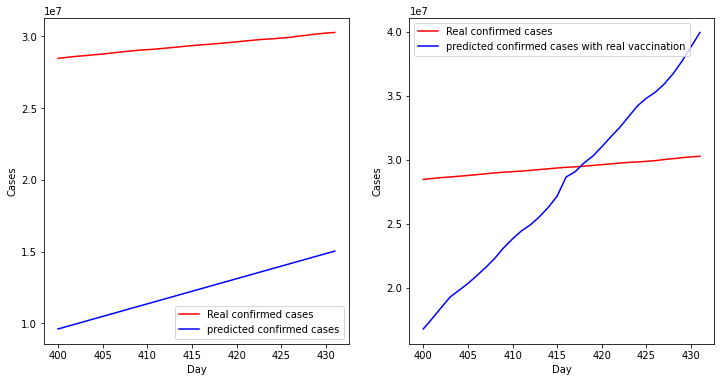

In [62]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.subplot(1,2,2)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.show()

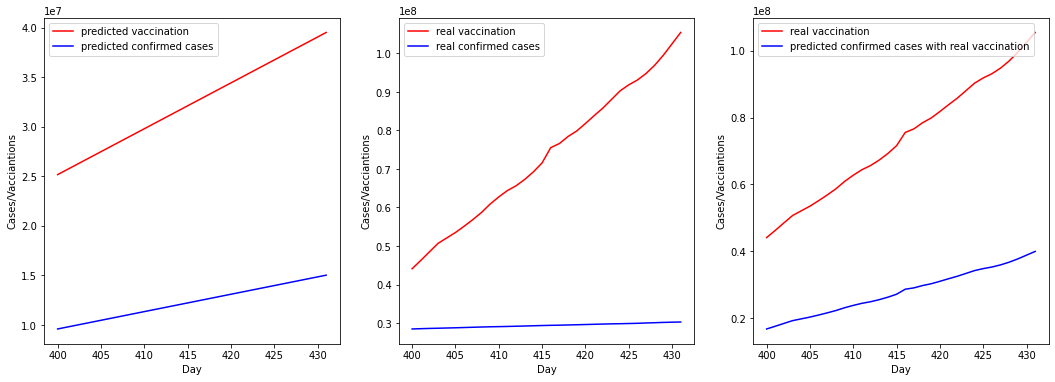

In [63]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(x_pred, y_v_pred, color='r', label="predicted vaccination")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,2)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_test,color='b', label="real confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,3)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.show()